In [56]:
#using PyCall
using LinearAlgebra
using PyPlot
#@pyimport numpy as np
n = 5
;

In [57]:


tempelaar_matrix = [
    16898 90 -791 -835 0;
    90 16890 -835 -791 0;
    -791 -835 18408 0 -902.637;
    -835 -791 0 18408 -902.637;
    0 0 -902.637 -902.637 14140
]

evals_evecs = eigen(tempelaar_matrix)


β = pi/2 # angle with the common axis
ϕ = 0 # phase


m = range(0,n-1,step = 1)
α = 1

function kvals()
    list_ = []
    for i in m
        k_i = ( 2 * pi * i )/(α*n)
        append!(list_,k_i)
    end    
    return list_
end   


k_values = kvals()

function TDM(i)

    μ = []

    for j in 1:n
        κ = [sin(β)*cos(ϕ + (j-1)*0*α ), sin(β)*sin(ϕ + (j-1)*0*α ),cos(β)]
        ζ = κ./norm(κ) # normalising the stuff
        if j > 2
            ζ = [0,0,0] ;
        end    

        push!(μ,ζ)
    end
    return μ    
    
end



tdm_k0 = TDM(1)' * evals_evecs.vectors[:,1]/norm(evals_evecs.vectors[:,1])
tdm_k1 = TDM(2)' * evals_evecs.vectors[:,2]/norm(evals_evecs.vectors[:,2])
tdm_k2 = TDM(3)' * evals_evecs.vectors[:,3]/norm(evals_evecs.vectors[:,3])
tdm_k3 = TDM(4)' * evals_evecs.vectors[:,4]/norm(evals_evecs.vectors[:,4]);
tdm_k4 = TDM(5)' * evals_evecs.vectors[:,5]/norm(evals_evecs.vectors[:,5]);


osc_k0 = tdm_k0 * tdm_k0'
osc_k1 = tdm_k1 *  tdm_k1'
osc_k2 = tdm_k2 * tdm_k2'
osc_k3 = tdm_k3 * tdm_k3';
osc_k4 = tdm_k4 * tdm_k4';

# $\textbf{PLOTS}$

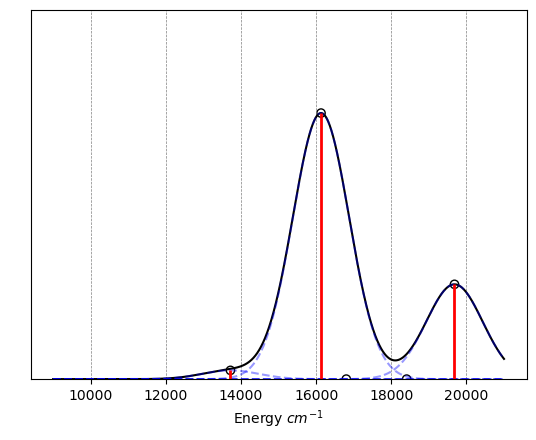

In [58]:


oscillator_energies = [osc_k0,osc_k1,osc_k2,osc_k3,osc_k4]
eigenvalues = evals_evecs.values

f(x,mu,sig) = (1/(sig*sqrt(pi)))*exp(-(x-mu)^2/(2*sig^2)) # equation for a gaussian

α = 9000
β = 21000
main_list_1 = []
for k = 1:5
    list_1 = []
    for x = range(α,β,step = 1e-2)
        push!(list_1,f.(x,eigenvalues[k],750)*oscillator_energies[k])
    end    
    push!(main_list_1,list_1)
end    

pp = (main_list_1[1])./(maximum(main_list_1[1])).*oscillator_energies[1] + (main_list_1[2])./(maximum(main_list_1[2])).*oscillator_energies[2] +(main_list_1[3])./(maximum(main_list_1[3])).*oscillator_energies[3]+(main_list_1[4])./(maximum(main_list_1[4])).*oscillator_energies[4] + (main_list_1[5])./(maximum(main_list_1[5])).*oscillator_energies[5]

x = range(α,β,step = 1e-2)
figure()
yticks([])
plot(x,pp, color = "black")
plot(x,(main_list_1[1])./(maximum(main_list_1[1])).*oscillator_energies[1] ,color = "blue",linestyle = "--",alpha = 0.4)
plot(x,(main_list_1[2])./(maximum(main_list_1[2])).*oscillator_energies[2] ,color = "blue",linestyle = "--",alpha = 0.4)
plot(x,(main_list_1[3])./(maximum(main_list_1[3])).*oscillator_energies[3] ,color = "blue",linestyle = "--",alpha = 0.4)
plot(x,(main_list_1[4])./(maximum(main_list_1[4])).*oscillator_energies[4] ,color = "blue",linestyle = "--",alpha = 0.4)
plot(x,(main_list_1[5])./(maximum(main_list_1[5])).*oscillator_energies[5] ,color = "blue",linestyle = "--",alpha = 0.4)

vlines(evals_evecs.values[1],0,oscillator_energies[1] ,color="red",lw=2) 
vlines(evals_evecs.values[2],0,oscillator_energies[2] ,color="red",lw=2) 
vlines(evals_evecs.values[3],0,oscillator_energies[3] ,color="red",lw=2) 
vlines(evals_evecs.values[4],0,oscillator_energies[4] ,color="red",lw=2) 
vlines(evals_evecs.values[5],0,oscillator_energies[5] ,color="red",lw=2) 
scatter(evals_evecs.values,oscillator_energies,color="black",marker="o",edgecolor="black",facecolors="none")



ylabel(" " ,fontsize=12)
xlabel("Energy \$cm^{-1}\$ ")
yticks()
grid(which="minor",color="gray", linestyle="--", linewidth=0.5)
grid(which="major",color="gray", linestyle="--", linewidth=0.5)
ylim([0,2])


gcf().set_dpi(600)
display(gcf())

In [59]:
# characters of eigenstates :

eigenvalues = evals_evecs.values
h = 6.62607015 * 10^(−34) 
c = 2.99792458 * 10^(8)
eigenvectors = evals_evecs.vectors


le = []
CT = []
TT = []
 
for i = 1:n
      le_char = eigenvectors[1,i]^2 + eigenvectors[2,i]^2
     CT_char = eigenvectors[3,i]^2 + eigenvectors[4,i]^2
     TT_char = eigenvectors[5,i]^2 
     push!(le,le_char)
     push!(CT,CT_char)
     push!(TT,TT_char)
end



In [60]:
state = zeros(n,3)

eigenvector_charlist = []
for i = 1:n
    push!(eigenvector_charlist,[le[i],CT[i],TT[i]])
end
;

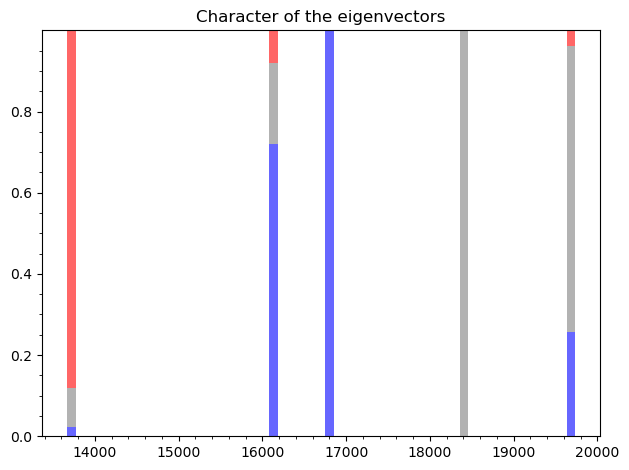

In [63]:
figure()
for i in 1:n
    bar(eigenvalues[i], eigenvector_charlist[i][1], width=1e2, color="blue", alpha=0.6)
    bar(eigenvalues[i], eigenvector_charlist[i][2], width=1e2, bottom=eigenvector_charlist[i][1], color="grey", alpha=0.6)
    bar(eigenvalues[i], eigenvector_charlist[i][3], width=1e2, bottom=eigenvector_charlist[i][1] + eigenvector_charlist[i][2], color="red", alpha=0.6)
end




title("Character of the eigenvectors")

minorticks_on()
tight_layout()
PyPlot.display_figs()